In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7924\1923691401.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
cars2 = pd.read_csv('pakwheels_used_car_data_v02.csv')

In [3]:
cars2.head()

,addref,city,assembly,body,make,model,year,engine,transmission,fuel,color,registered,mileage,price
0,7943732,Peshawar,NaN,Sedan,Toyota,Corolla,2013.0,1300.0,Manual,Petrol,Silver Metallic,Lahore,145000,2870000.0
1,7730314,Lahore,NaN,Sedan,Honda,City,2000.0,1300.0,Manual,Petrol,Blue,Lahore,230000,995000.0
2,7943737,Lahore,NaN,Sedan,Toyota,Yaris,2021.0,1300.0,Manual,Petrol,Super White,Punjab,60500,3585000.0
3,7943733,Lahore,NaN,Hatchback,Suzuki,Swift,2017.0,1300.0,Manual,Petrol,Grey,Islamabad,87000,2250000.0
4,7923484,Lahore,NaN,Sedan,Honda,Civic,2017.0,1800.0,Automatic,Petrol,Grey,Lahore,86000,4850000.0


In [3]:
cars2.drop(['assembly'], axis=1, inplace=True)

In [4]:
cars2.drop(cars2[(cars2['model']=='Mehran') & (cars2['engine']<600)].index, inplace=True)


In [6]:
cars2.dropna(inplace=True)

In [7]:
cars2.drop(cars2[cars2['engine']==100].index,inplace=True)

In [8]:
cars2.drop(cars2[cars2['engine']==220].index,inplace=True)

In [9]:
cars2.drop(cars2[cars2['engine']==7744].index,inplace=True)

In [ ]:
cars2.drop(cars2[cars2['model']=='X7'].index, inplace=True)

In [52]:
cars2.describe()

,addref,year,engine,mileage,price
count,6.336100e+04,63361.000000,63361.000000,63361.000000,6.336100e+04
mean,7.814355e+06,2013.347138,1396.888370,91229.893831,3.860609e+06
std,2.562601e+05,7.159979,636.147198,83517.752246,5.031078e+06
min,4.478110e+05,1990.000000,600.000000,1.000000,1.100000e+05
25%,7.808732e+06,2008.000000,1000.000000,38000.000000,1.550000e+06
50%,7.868026e+06,2015.000000,1300.000000,80000.000000,2.800000e+06
75%,7.911300e+06,2019.000000,1600.000000,122000.000000,4.550000e+06
max,7.943741e+06,2022.000000,6800.000000,1000000.000000,1.700000e+08


In [55]:
cars2[(cars2['model']=='Mehran') & (cars2['transmission']=='Automatic')][['year', 'price']]


,year,price
7223,1991.0,450000.0
9192,2000.0,625000.0
13014,2007.0,530000.0
16193,1994.0,900000.0
20843,1990.0,590000.0
26740,2007.0,995000.0
31748,2005.0,545000.0
34263,1998.0,725000.0
37409,1999.0,990000.0
37646,1993.0,550000.0


In [51]:
cars2.drop(cars2[cars2['price'] == cars2['price'].max()].index, inplace=True)

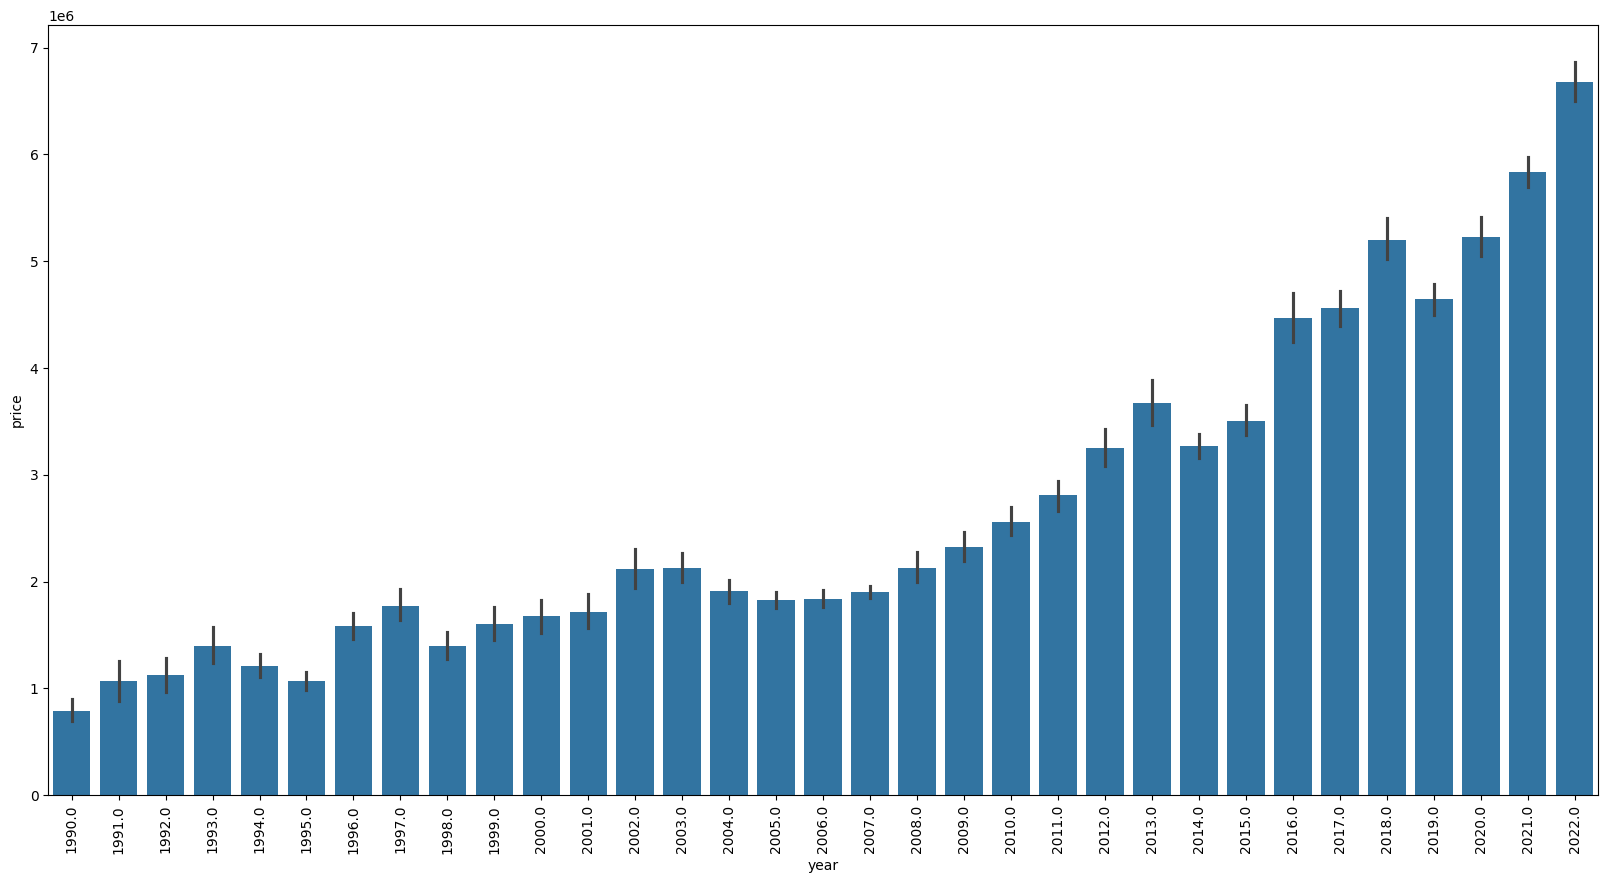

In [56]:
plt.figure(figsize=(20,10))
sns.barplot(x='year', y='price', data=cars2)
plt.xticks(rotation=90)
plt.show()

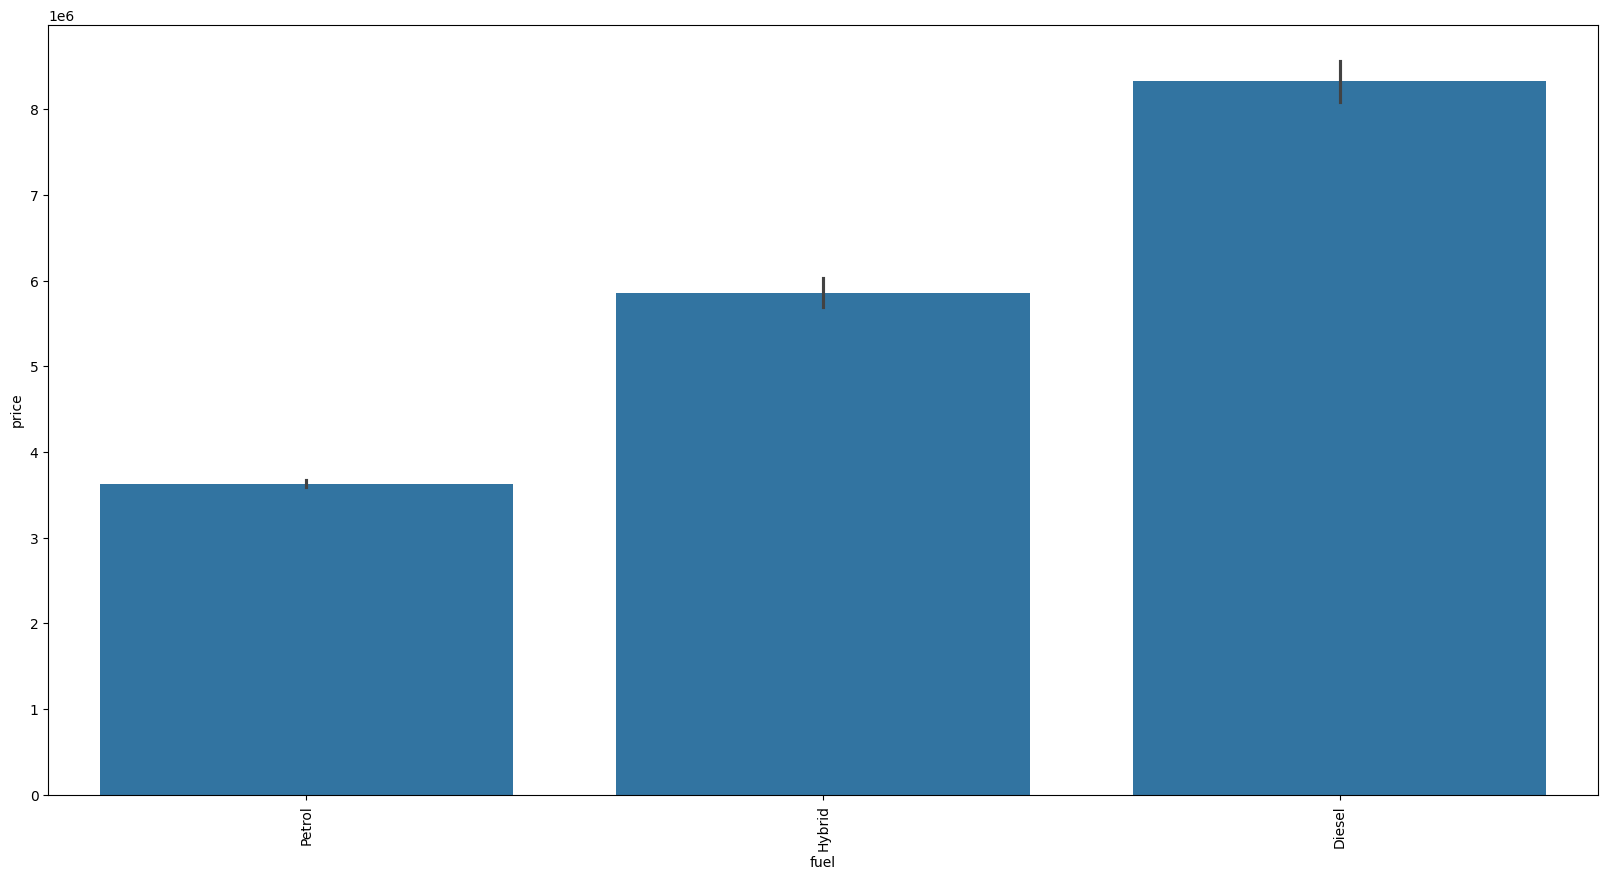

In [57]:
plt.figure(figsize=(20,10))
sns.barplot(x='fuel', y='price', data=cars2)
plt.xticks(rotation=90)
plt.show()

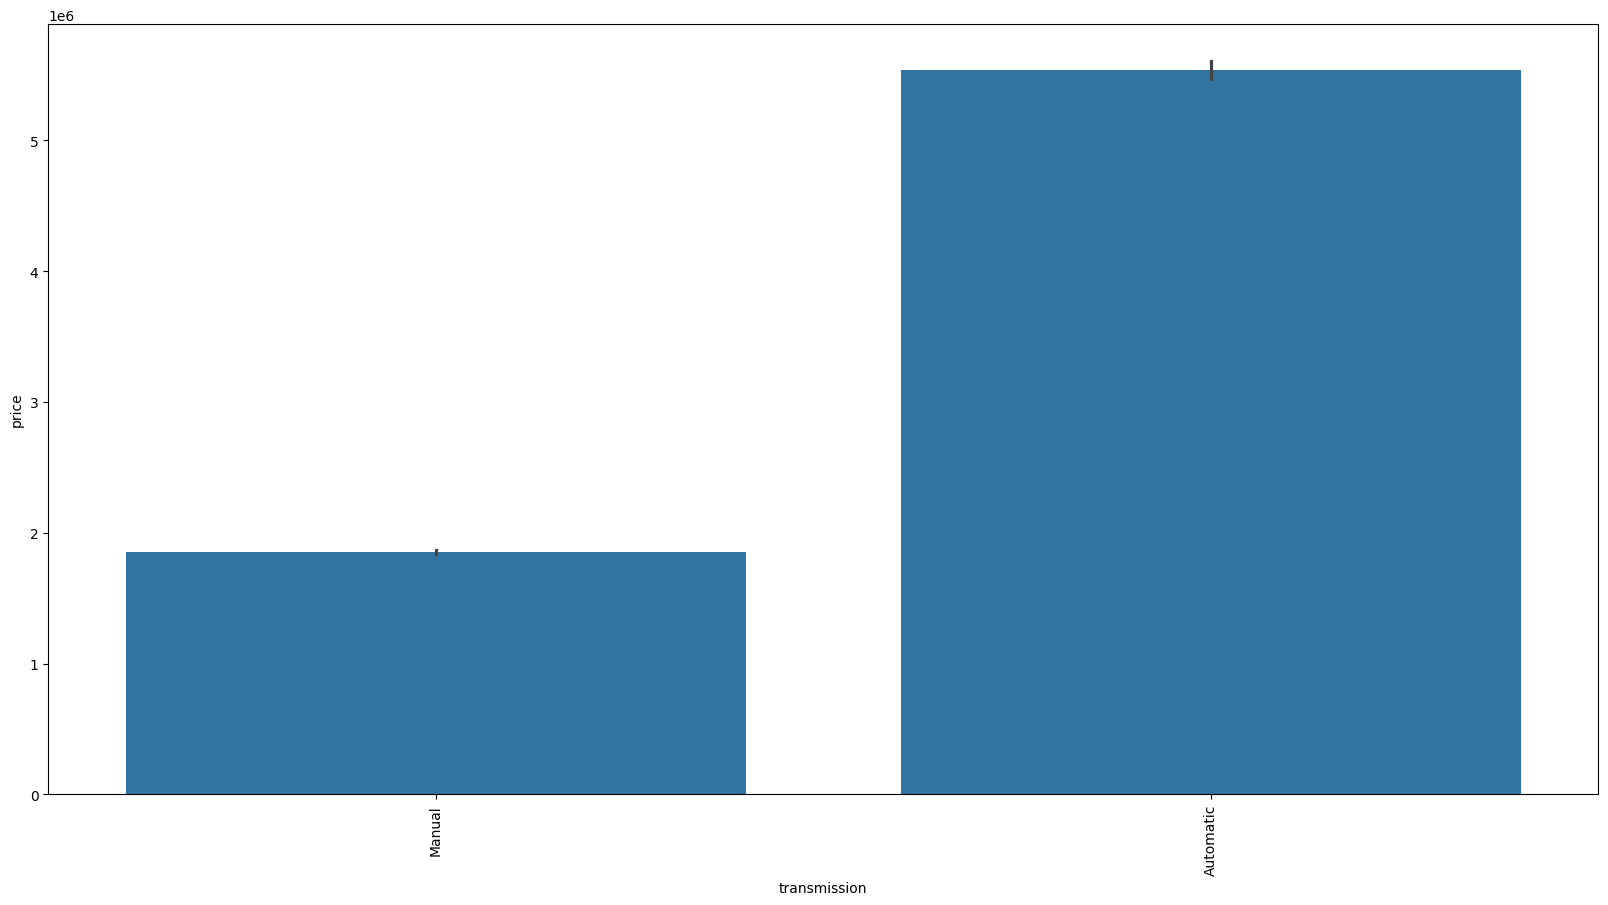

In [58]:
plt.figure(figsize=(20,10))
sns.barplot(x='transmission', y='price', data=cars2)
plt.xticks(rotation=90)
plt.show()

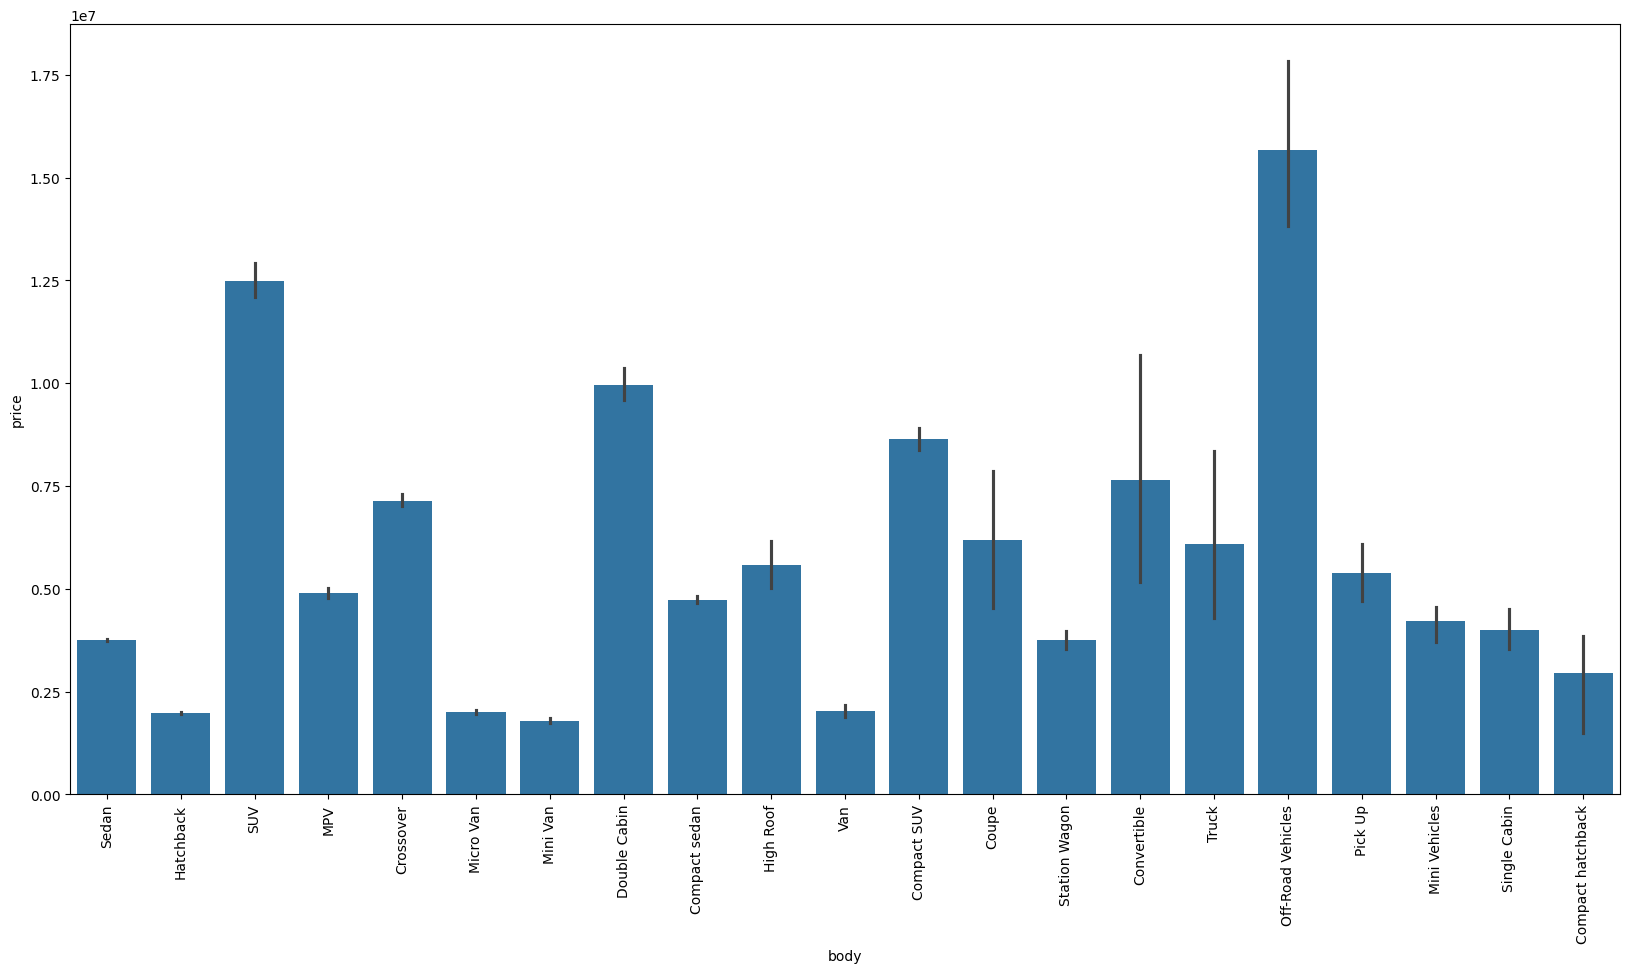

In [59]:
plt.figure(figsize=(20,10))
sns.barplot(x='body', y='price', data=cars2)
plt.xticks(rotation=90)
plt.show()

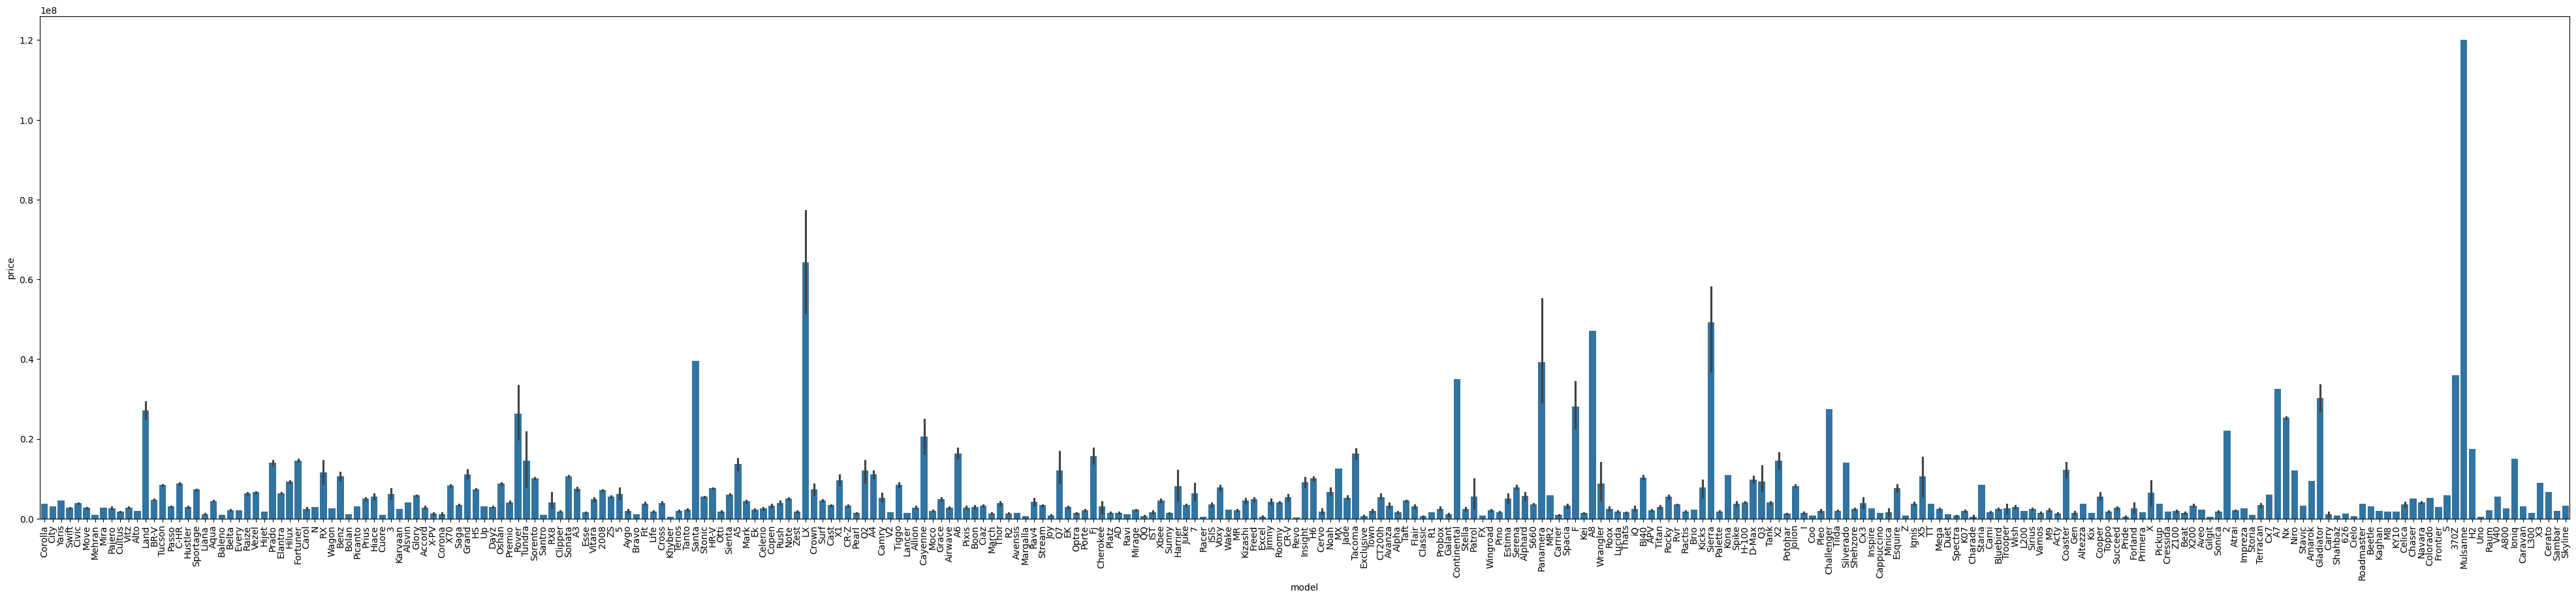

In [104]:
plt.figure(figsize=(50,10))
sns.barplot(x='model', y='price', data=cars2)
plt.xticks(rotation=90)
plt.show()

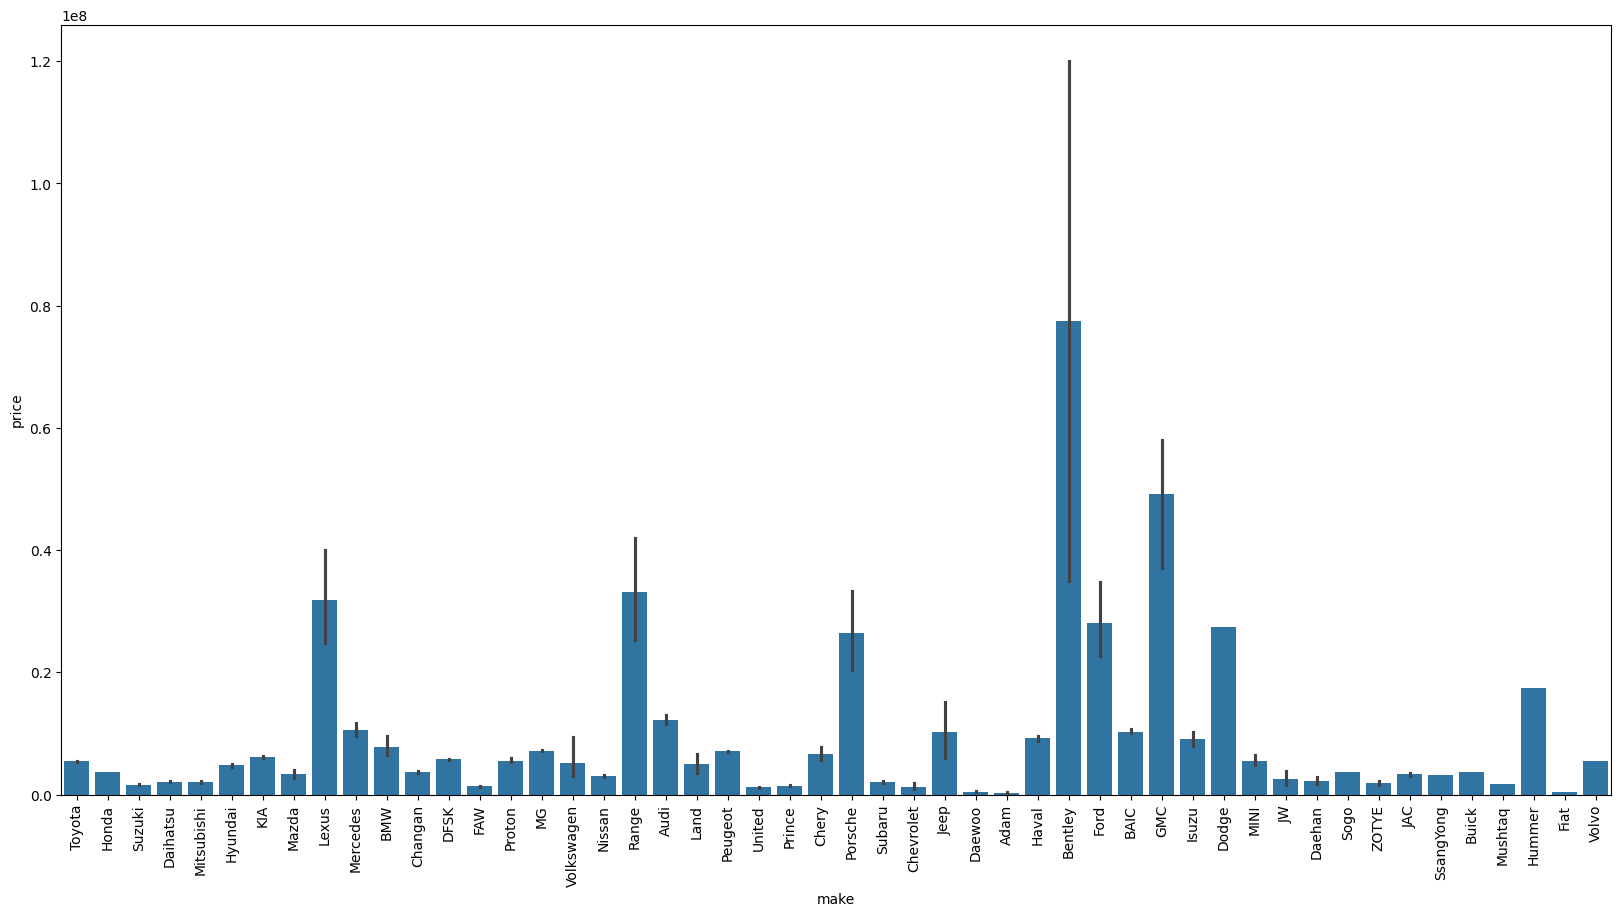

In [67]:
plt.figure(figsize=(20,10))
sns.barplot(x='make', y='price', data=cars2)
plt.xticks(rotation=90)
plt.show()

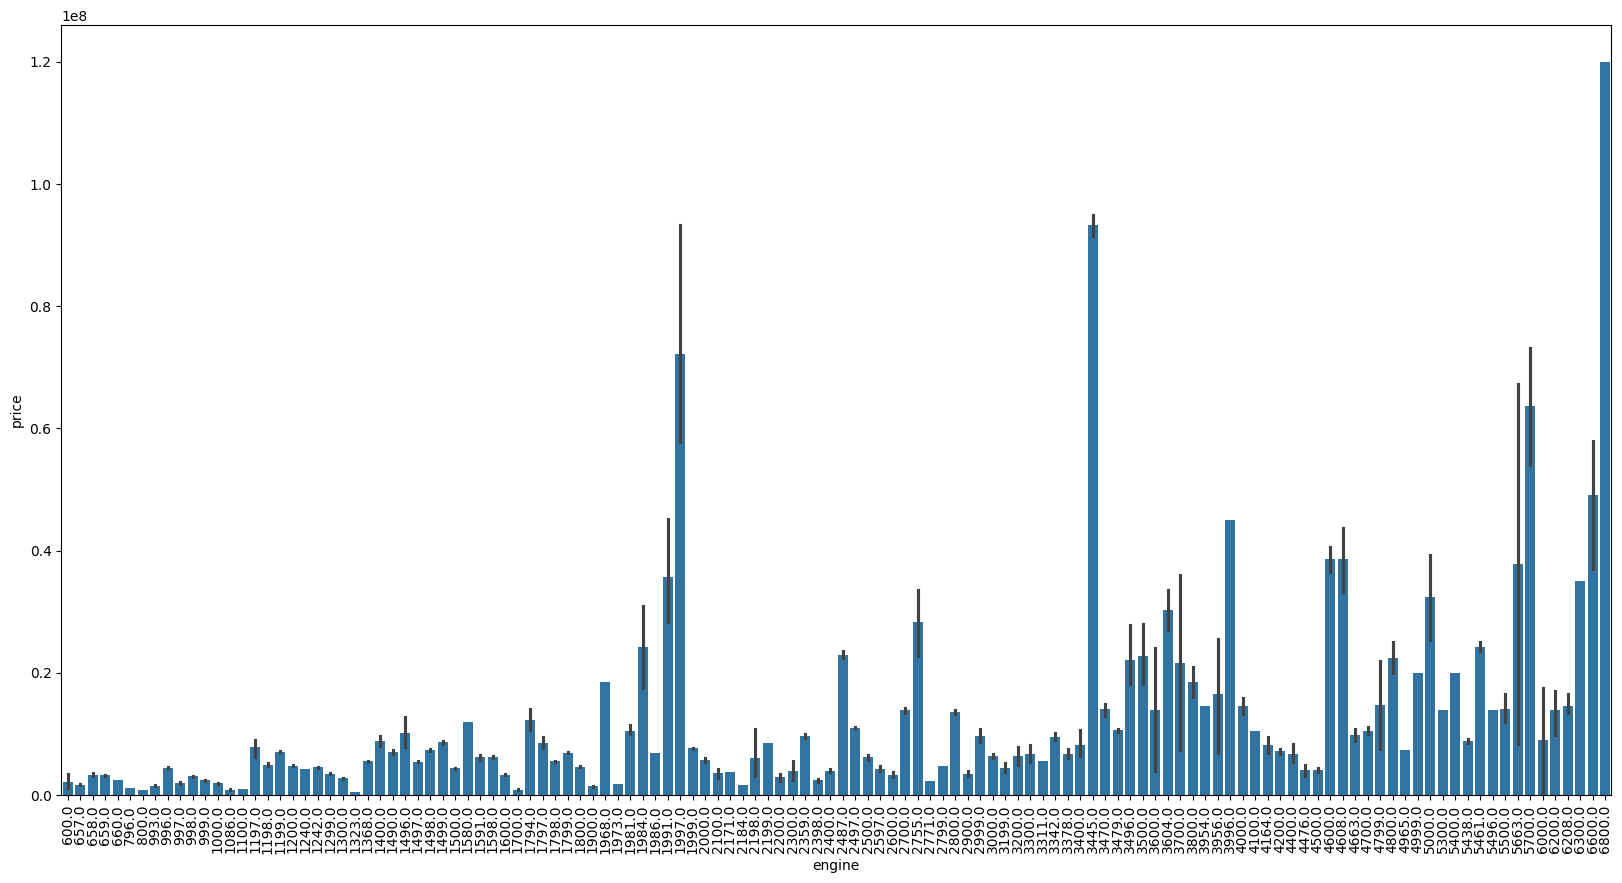

In [105]:
plt.figure(figsize=(20,10))
sns.barplot(x='engine', y='price', data=cars2)
plt.xticks(rotation=90)
plt.show()

## FEATURES
- year
- fuel
- transmission
- engine
- body
- make
- model
- mileage

In [108]:
cars2.columns

Index(['addref', 'city', 'body', 'make', 'model', 'year', 'engine',
       'transmission', 'fuel', 'color', 'registered', 'mileage', 'price'],
      dtype='object')

In [109]:
cars2.to_csv('cleaned.csv')

In [110]:
cleaned = pd.read_csv('cleaned.csv')

In [111]:
cleaned.head()

,Unnamed: 0,addref,city,body,make,model,year,engine,transmission,fuel,color,registered,mileage,price
0,0,7943732,Peshawar,Sedan,Toyota,Corolla,2013.0,1300.0,Manual,Petrol,Silver Metallic,Lahore,145000,2870000.0
1,1,7730314,Lahore,Sedan,Honda,City,2000.0,1300.0,Manual,Petrol,Blue,Lahore,230000,995000.0
2,2,7943737,Lahore,Sedan,Toyota,Yaris,2021.0,1300.0,Manual,Petrol,Super White,Punjab,60500,3585000.0
3,3,7943733,Lahore,Hatchback,Suzuki,Swift,2017.0,1300.0,Manual,Petrol,Grey,Islamabad,87000,2250000.0
4,4,7923484,Lahore,Sedan,Honda,Civic,2017.0,1800.0,Automatic,Petrol,Grey,Lahore,86000,4850000.0


In [112]:
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63360 entries, 0 to 63359
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    63360 non-null  int64  
 1   addref        63360 non-null  int64  
 2   city          63360 non-null  object 
 3   body          63360 non-null  object 
 4   make          63360 non-null  object 
 5   model         63360 non-null  object 
 6   year          63360 non-null  float64
 7   engine        63360 non-null  float64
 8   transmission  63360 non-null  object 
 9   fuel          63360 non-null  object 
 10  color         63360 non-null  object 
 11  registered    63360 non-null  object 
 12  mileage       63360 non-null  int64  
 13  price         63360 non-null  float64
dtypes: float64(3), int64(3), object(8)
memory usage: 6.8+ MB


In [113]:
cleaned.describe()

,Unnamed: 0,addref,year,engine,mileage,price
count,63360.000000,6.336000e+04,63360.000000,63360.000000,63360.000000,6.336000e+04
mean,38812.792645,7.814363e+06,2013.347049,1396.863068,91231.330540,3.859171e+06
std,22440.163006,2.562550e+05,7.160001,636.120336,83517.628336,5.018072e+06
min,0.000000,4.478110e+05,1990.000000,600.000000,1.000000,1.100000e+05
25%,19570.750000,7.808736e+06,2008.000000,1000.000000,38000.000000,1.550000e+06
50%,38723.500000,7.868027e+06,2015.000000,1300.000000,80000.000000,2.800000e+06
75%,58191.250000,7.911300e+06,2019.000000,1600.000000,122000.000000,4.550000e+06
max,77877.000000,7.943741e+06,2022.000000,6800.000000,1000000.000000,1.700000e+08
